# First video tests

In [3]:
# Imports

from PIL import Image
import os, os.path
import numpy as np
import skimage

import matplotlib.pyplot as plt

#scikit-image ???
from skimage.measure import compare_ssim
from skimage.color import rgb2gray
from skimage.io import imread

#for animation
from matplotlib import animation, rc
from IPython.display import HTML

print("Imports done")

Imports done


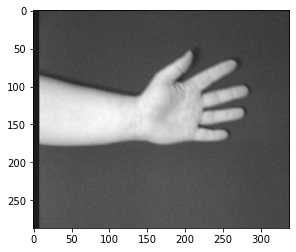

Settings saved


In [4]:
# Settings

path = "C:/Users/Benjamin/Documents/LTU/Neural Net. and Learn. Machines/101 - Retina Project/peipa/" #already PGM format for first video
path = "C:/Users/Benjamin/Documents/LTU/Neural Net. and Learn. Machines/101 - Retina Project/peipa/" #already PGM format for first video
img_name = "hand-"
img_format = ".pgm"
full_path = path + img_name

#nbr of frame
nbr_frame = len([name for name in os.listdir(path)]) #in case it's already in PGM format

# Open and check images format

img = Image.open(path + img_name + "1" + img_format)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

print("Settings saved")

In [19]:
# Video check

# %matplotlib inline

#anim params
ms_int = 20

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, img.size[0]))
ax.set_ylim(( 0, img.size[1]))

im = plt.imshow(imread(full_path + "1" + img_format), cmap='gray', vmin=0, vmax=255)

# animation function.  This is called sequentially
def animate(i):
    im.set_array(imread(full_path + str(i+2) + img_format))
    return [im]

# call the animator. blit=True means only re-draw the parts that have changed.
anim1 = animation.FuncAnimation(fig, animate, frames=nbr_frame-2, interval=ms_int, blit=True)

plt.close()
HTML(anim1.to_html5_video())

C:\Logiciels\Anaconda\envs\nnlm\lib\site-packages\ipykernel_launcher.py:12: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  if sys.path[0] == '':


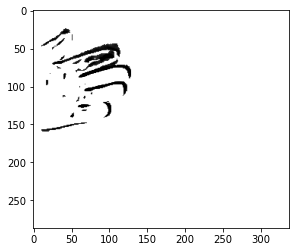

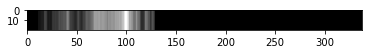

78.9264426831419 23.27638202951978


In [20]:
# Test

#diff params
th = 0.2 #threshold for chgt detection

# load the two input images
full_path = path + img_name
grayA = imread(full_path + "45" + img_format)
grayB = imread(full_path + "46" + img_format)

# compute ssim (struc sim)
(score, sim) = compare_ssim(grayA, grayB, full=True)
sim[sim>th] = 1
plt.imshow(sim, cmap='gray', vmin=0, vmax=1)
plt.show()

# mean on column
col_mean = np.array(1 - sim).sum(0) # 1 - values to inverse
col_mean /= max(col_mean) # one way to do it

h = 20
col_mean_graph = np.tile((col_mean), (h, 1))
plt.imshow(col_mean_graph, cmap='gray', vmin=0, vmax=1)
plt.show()

values = np.array([col_mean[i]*i for i in range(len(col_mean))])
mean = values.sum() / col_mean.sum()

values = np.array([abs(i-mean)*     col_mean[i] for i in range(len(col_mean))])
var = values.sum() / col_mean.sum()

print(mean,var)

C:\Logiciels\Anaconda\envs\nnlm\lib\site-packages\ipykernel_launcher.py:9: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  if __name__ == '__main__':


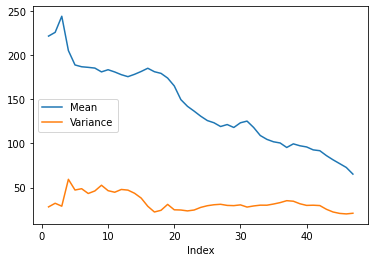

In [21]:
# Getting positions (mean, variance) from test video

#diff params
th = 0.1 #threshold for chgt detection

#if a result = None, then no diff detected between the two images
def get_mvt_data(grayA,grayB):
    # compute ssim (struc sim)
    (score, sim) = compare_ssim(grayA, grayB, full=True)
    sim[sim>th] = 1

    # reduce to 1D (column)
    col_mean = np.array(1 - sim).sum(0) # 1 - values to inverse and compute according to max of diff

    if col_mean.sum() == 0:
        return {"m": None,"v": None}

    else:
        col_mean /= max(col_mean)
        values = np.array([col_mean[i]*i for i in range(len(col_mean))])
        mean = values.sum() / col_mean.sum()

        values = np.array([abs(i-mean)*col_mean[i] for i in range(len(col_mean))])
        var = values.sum() / col_mean.sum()

        return {"m": mean,"v": var}


# load the two input images
full_path = path + img_name
datas = []
# for i in range(1):
for i in range(nbr_frame - 2):
    A = imread(full_path + str(i+1) + img_format)
    B = imread(full_path + str(i+2) + img_format)
    datas.append(get_mvt_data(A,B))

points = np.zeros((nbr_frame - 1,img.size[0]),int)
for i in range(nbr_frame - 2):
    if datas[i]['m'] != None:
        size = int(round(datas[i]['v']/2,0))
        mean_pixel = int(round(datas[i]['m'],0))
        for j in range(size-1):
            points[i][mean_pixel - j] = 1
            points[i][mean_pixel + j] = 1

plt.plot([datas[i]['m'] for i in range(len(datas))], label="Mean")
plt.plot([datas[i]['v'] for i in range(len(datas))], label="Variance")
plt.legend(loc="center left")
plt.xlabel("Index")
plt.show()

In [22]:
# Average motion animation

# %matplotlib inline

#anim params
ms_int = 100

h = 20 #width
def mult_row(row,h):
    return np.tile((row), (h, 1))

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((0, img.size[0]))
ax.set_ylim((0, h))

im = plt.imshow(np.zeros((h,img.size[0])), cmap='gray', vmin=0, vmax=1)

# animation function.  This is called sequentially
def animate(i):
    im.set_array(mult_row(points[i+1],h))
    return [im]

# call the animator. blit=True means only re-draw the parts that have changed.
anim2 = animation.FuncAnimation(fig, animate, frames=nbr_frame - 2, interval=ms_int, blit=True)

plt.close()
HTML(anim2.to_html5_video())

In [23]:
HTML(anim1.to_html5_video())